#  Import Libraries




In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import glob
import pandas as pan
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report

# Read DataSet



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_data=('/content/drive/MyDrive/MiniProject/Animals Mammal/Mammal')
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,snow_leopard
1,arctic_fox
2,dolphin
3,african_elephant
4,brown_bear


In [ ]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/MiniProject/Animals Mam...,brown_bear
1,/content/drive/MyDrive/MiniProject/Animals Mam...,african_elephant
2,/content/drive/MyDrive/MiniProject/Animals Mam...,snow_leopard
3,/content/drive/MyDrive/MiniProject/Animals Mam...,dolphin
4,/content/drive/MyDrive/MiniProject/Animals Mam...,snow_leopard
...,...,...
1618,/content/drive/MyDrive/MiniProject/Animals Mam...,arctic_fox
1619,/content/drive/MyDrive/MiniProject/Animals Mam...,dolphin
1620,/content/drive/MyDrive/MiniProject/Animals Mam...,brown_bear
1621,/content/drive/MyDrive/MiniProject/Animals Mam...,dolphin


# Visualization

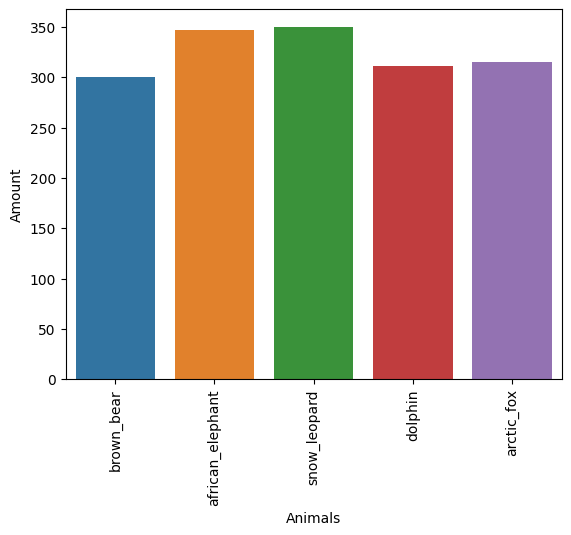

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.countplot(x="Label", hue=dataframe["Label"], palette=colors, data=dataframe, legend=False)
plt.xlabel("Animals")
plt.ylabel("Amount")
plt.xticks(rotation=90)
plt.show()

# Split Dataset

In [ ]:
train_data_dir =image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 1623 files belonging to 5 classes.
Using 1299 files for training.
Found 1623 files belonging to 5 classes.
Using 324 files for validation.


In [ ]:
class_names = train.class_names
class_names

['african_elephant', 'arctic_fox', 'brown_bear', 'dolphin', 'snow_leopard']

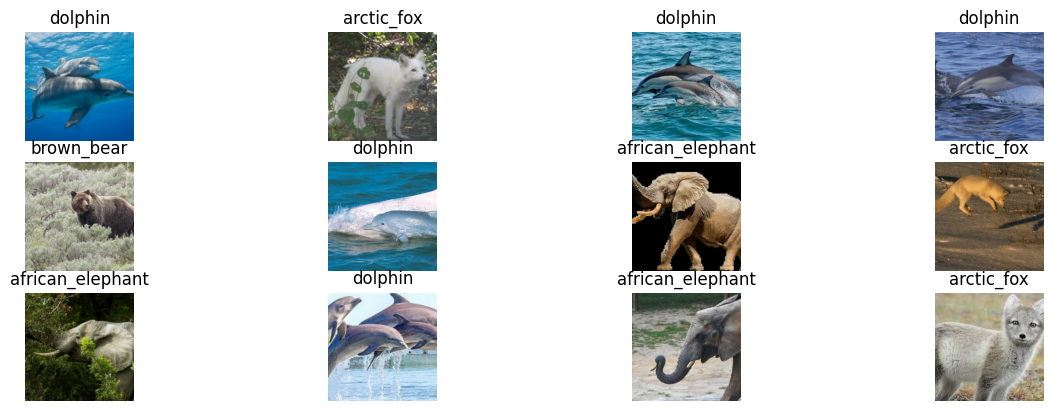

In [ ]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(12):
        ax = plt.subplot(12, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Keras_Model

In [ ]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(45,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 28224)             0         
                                                                 
 dropout_2 (Dropout)         (None, 28224)             0         
                                                                 
 dense_5 (Dense)             (None, 45)                1270125   
                                                                 
Total params: 2209245 (8.43 MB)
Trainable params: 1270125 (4.85 MB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


In [ ]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [ ]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

# Training

In [ ]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit(train,epochs=10,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 1.0854 - accuracy: 0.8483

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 42s 2s/step - loss: 1.0854 - accuracy: 0.8483 - val_loss: 0.0277 - val_accuracy: 0.9969
Epoch 2/10
21/21 [==============================] - 37s 2s/step - loss: 0.0332 - accuracy: 0.9923 - val_loss: 0.0274 - val_accuracy: 0.9938
Epoch 3/10
21/21 [==============================] - 33s 1s/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0153 - val_accuracy: 0.9938
Epoch 4/10
21/21 [==============================] - 36s 2s/step - loss: 0.0119 - accuracy: 0.9954 - val_loss: 0.0323 - val_accuracy: 0.9938
Epoch 5/10
21/21 [==============================] - 31s 1s/step - loss: 0.0060 - accuracy: 0.9977 - val_loss: 0.0053 - val_accuracy: 0.9969
Epoch 6/10
21/21 [==============================] - 31s 1s/step - loss: 0.0075 - accuracy: 0.9969 - val_loss: 0.0240 - val_accuracy: 0.9938
Epoch 7/10
21/21 [==============================] - 33s 2s/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.0353 - val_accuracy: 0.9938
Epoch 8/10
21/21 [=============

In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.085380,0.848345,0.027723,0.996914
1,0.033173,0.992302,0.027434,0.993827
2,0.010074,0.996921,0.015304,0.993827
3,0.011945,0.995381,0.032264,0.993827
4,0.005966,0.997691,0.005297,0.996914
5,0.007530,0.996921,0.023985,0.993827
6,0.008047,0.998460,0.035319,0.993827
7,0.006740,0.997691,0.025674,0.993827
8,0.009289,0.997691,0.021361,0.993827
9,0.012915,0.996151,0.003951,0.996914


In [ ]:
loss, acc = keras_model.evaluate(validation)
print('Test Loss =', loss)
print('Test Accuracy =', acc)

6/6 [==============================] - 5s 567ms/step - loss: 0.0040 - accuracy: 0.9969
Test Loss = 0.003950882703065872
Test Accuracy = 0.9969135522842407


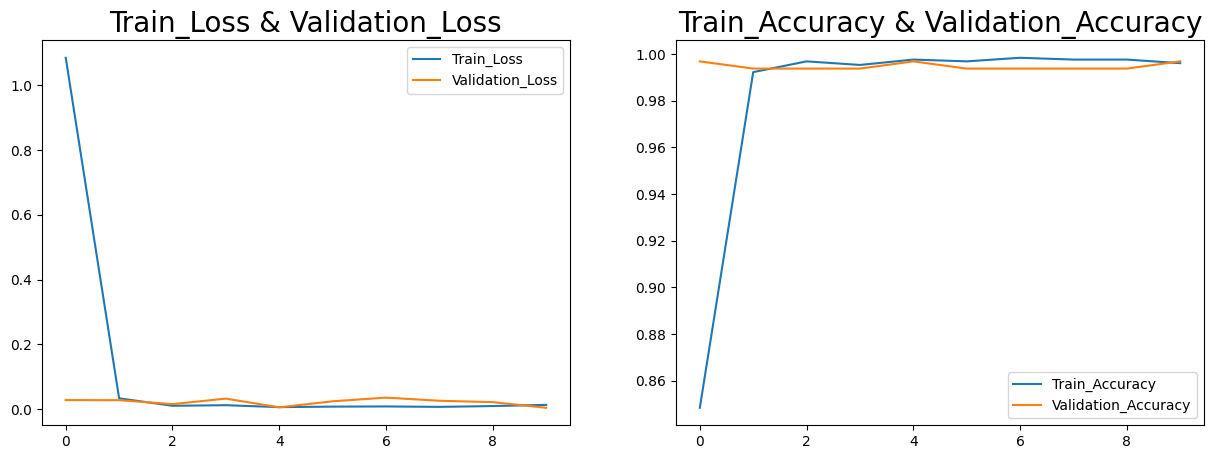

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

# Model ANN

In [ ]:
ann_model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(45, activation='softmax')
])

In [ ]:
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

hist = ann_model.fit(train, epochs=10, validation_data=validation, callbacks=[checkpoint, early_stopping])

Epoch 1/10
21/21 [==============================] - 18s 674ms/step - loss: 8585.6973 - accuracy: 0.2109 - val_loss: 2943.0078 - val_accuracy: 0.2778
Epoch 2/10
21/21 [==============================] - 17s 701ms/step - loss: 1982.1785 - accuracy: 0.3995 - val_loss: 1286.0923 - val_accuracy: 0.4630
Epoch 3/10
21/21 [==============================] - 17s 726ms/step - loss: 995.6683 - accuracy: 0.5012 - val_loss: 752.6775 - val_accuracy: 0.4660
Epoch 4/10
21/21 [==============================] - 17s 682ms/step - loss: 1261.1528 - accuracy: 0.4550 - val_loss: 1016.0319 - val_accuracy: 0.4969
Epoch 5/10
21/21 [==============================] - 17s 684ms/step - loss: 660.7111 - accuracy: 0.5227 - val_loss: 535.8508 - val_accuracy: 0.5370
Epoch 6/10
21/21 [==============================] - 16s 671ms/step - loss: 829.5043 - accuracy: 0.4919 - val_loss: 504.9201 - val_accuracy: 0.4846
Epoch 7/10
21/21 [==============================] - 29s 1s/step - loss: 922.6675 - accuracy: 0.4904 - val_loss: 

In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,8585.697266,0.210931,2943.007812,0.277778
1,1982.178467,0.399538,1286.092285,0.462963
2,995.668274,0.501155,752.677490,0.466049
3,1261.152832,0.454965,1016.031921,0.496914
4,660.711121,0.522710,535.850769,0.537037
5,829.504333,0.491917,504.920135,0.484568
6,922.667542,0.490377,1371.284424,0.540123
7,923.691406,0.528099,608.177063,0.583333
8,977.988342,0.480370,784.259277,0.496914
9,892.580444,0.534257,1096.009644,0.527778


In [ ]:
loss, acc = ann_model.evaluate(validation)
print('Test Loss =', loss)
print('Test Accuracy =', acc)

6/6 [==============================] - 3s 97ms/step - loss: 1096.0094 - accuracy: 0.5278
Test Loss = 1096.0093994140625
Test Accuracy = 0.5277777910232544


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,8585.697266,0.210931,2943.007812,0.277778
1,1982.178467,0.399538,1286.092285,0.462963
2,995.668274,0.501155,752.677490,0.466049
3,1261.152832,0.454965,1016.031921,0.496914
4,660.711121,0.522710,535.850769,0.537037
5,829.504333,0.491917,504.920135,0.484568
6,922.667542,0.490377,1371.284424,0.540123
7,923.691406,0.528099,608.177063,0.583333
8,977.988342,0.480370,784.259277,0.496914
9,892.580444,0.534257,1096.009644,0.527778


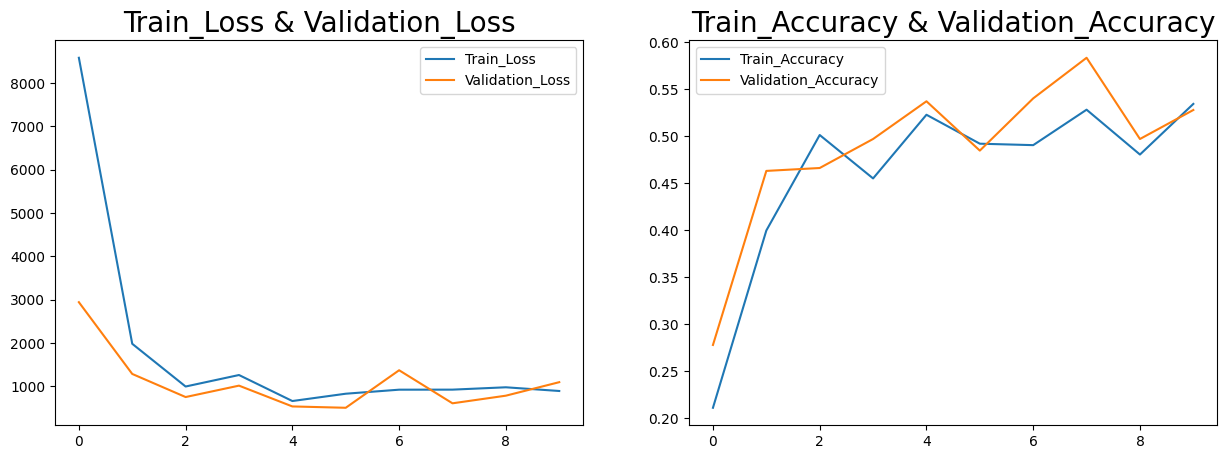

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [ ]:
import pickle


with open('keras_model.pickle', 'wb') as f:
    pickle.dump(keras_model, f)

In [ ]:
with open('keras_model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loss, acc = loaded_model.evaluate(validation)
print('Test Loss =', loss)
print('Test Accuracy =', acc)


6/6 [==============================] - 7s 531ms/step - loss: 0.0040 - accuracy: 0.9969
Test Loss = 0.003950882703065872
Test Accuracy = 0.9969135522842407
